<a href="https://colab.research.google.com/github/aaaksenova/SberTest/blob/change/Sber_Test_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genderlect analysis based on the bank operator dialogs

In [1]:
# Downloading data
! wget https://github.com/aaaksenova/SberTest/raw/change/f_in.zip
! wget https://github.com/aaaksenova/SberTest/raw/change/m_in.zip
! unzip '/content/m_in.zip'
! unzip '/content/f_in.zip'

--2021-06-02 06:49:51--  https://github.com/aaaksenova/SberTest/raw/change/f_in.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aaaksenova/SberTest/change/f_in.zip [following]
--2021-06-02 06:49:51--  https://raw.githubusercontent.com/aaaksenova/SberTest/change/f_in.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12857 (13K) [application/zip]
Saving to: ‘f_in.zip’

f_in.zip            100%[===================>]  12.56K  --.-KB/s    in 0.001s  

2021-06-02 06:49:51 (19.3 MB/s) - ‘f_in.zip’ saved [12857/12857]

--2021-06-02 06:49:52--  https://github.com/aaaksenova/SberTest/raw/change/m_in

In [2]:
! pip install spacy --upgrade

     |████████████████████████████████| 12.8MB 1.6MB/s 
     |████████████████████████████████| 1.1MB 48.3MB/s 
     |████████████████████████████████| 9.1MB 195kB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 460kB 37.8MB/s 
     |████████████████████████████████| 122kB 53.6MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=70a288eaa221f4453f9a0227f975b8ac415bea10c0f4f0f8941e9bcf1a3af76e
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found ex

In [3]:
! python -m spacy download ru_core_news_md

2021-06-02 06:50:17.269687: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 43.9MB 100kB/s 
     |████████████████████████████████| 61kB 2.3MB/s 
     |████████████████████████████████| 8.2MB 5.2MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')


## POS frequency analysis

In [4]:
import spacy
from collections import Counter
import os

nlp = spacy.load('ru_core_news_md')

In [5]:
def pos_anlysis(dir_path, model):
    '''Function takes path to the directory with dialoque files 
    and processing model as arguments and returns a dictionary
    with POS as keys and their frequencies as values'''

    speech = {} # Phrases of each operator in case we want to analyse them later
    for idx, fil in enumerate(os.listdir(dir_path)):
        if fil.endswith('txt'):
            with open(os.path.join(dir_path, fil)) as fh:
                sp = [i.strip() for i in fh.readlines()]
            speech[idx] = sp
    text = ''
    for i in speech.keys():
        text = ' '.join([text, ' '.join(speech[i])])
    text = text.replace('попкорн', '') 
    doc = model(text)
    words = [w.pos_ for w in doc]
    counts = Counter(words)
    pos_freq = {k:counts[k]/len(doc) for k in counts.keys()}
    print('Total number of tokens:', len(doc))
    return text, pos_freq

In [6]:
f_text, fem = pos_anlysis('/content/f_in', nlp)
m_text, m = pos_anlysis('/content/m_in', nlp)

Total number of tokens: 1737
Total number of tokens: 3589


In [7]:
fem

{'ADJ': 0.05872193436960276,
 'ADP': 0.10823258491652274,
 'ADV': 0.1001727115716753,
 'AUX': 0.017271157167530225,
 'CCONJ': 0.033966609096142776,
 'DET': 0.03684513529073115,
 'NOUN': 0.26137017846862404,
 'NUM': 0.022452504317789293,
 'PART': 0.051237766263673,
 'PRON': 0.1070811744386874,
 'SCONJ': 0.022452504317789293,
 'SPACE': 0.004029936672423719,
 'VERB': 0.17616580310880828}

In [8]:
m

{'ADJ': 0.06854276957369741,
 'ADP': 0.10838673725271664,
 'ADV': 0.07467261075508498,
 'AUX': 0.014488715519643355,
 'CCONJ': 0.03120646419615492,
 'DET': 0.0448592922819727,
 'NOUN': 0.2513234884368905,
 'NUM': 0.012816940651992199,
 'PART': 0.05433268319866258,
 'PRON': 0.13346336026748398,
 'SCONJ': 0.02814154360546113,
 'SPACE': 0.00027862914460852607,
 'VERB': 0.1774867651156311}

In [9]:
import pandas as pd

# Dataframe for visualization and further investigations
df = pd.DataFrame({'tags': fem.keys(), 'freqs_f': fem.values()})
df['freqs_m'] = df['tags'].apply(lambda x : m[x])

In [10]:
df = df.sort_values(by='freqs_f', ascending=False)
df

,tags,freqs_f,freqs_m
1,NOUN,0.261370,0.251323
2,VERB,0.176166,0.177487
9,ADP,0.108233,0.108387
4,PRON,0.107081,0.133463
7,ADV,0.100173,0.074673
5,ADJ,0.058722,0.068543
3,PART,0.051238,0.054333
10,DET,0.036845,0.044859
6,CCONJ,0.033967,0.031206
8,NUM,0.022453,0.012817


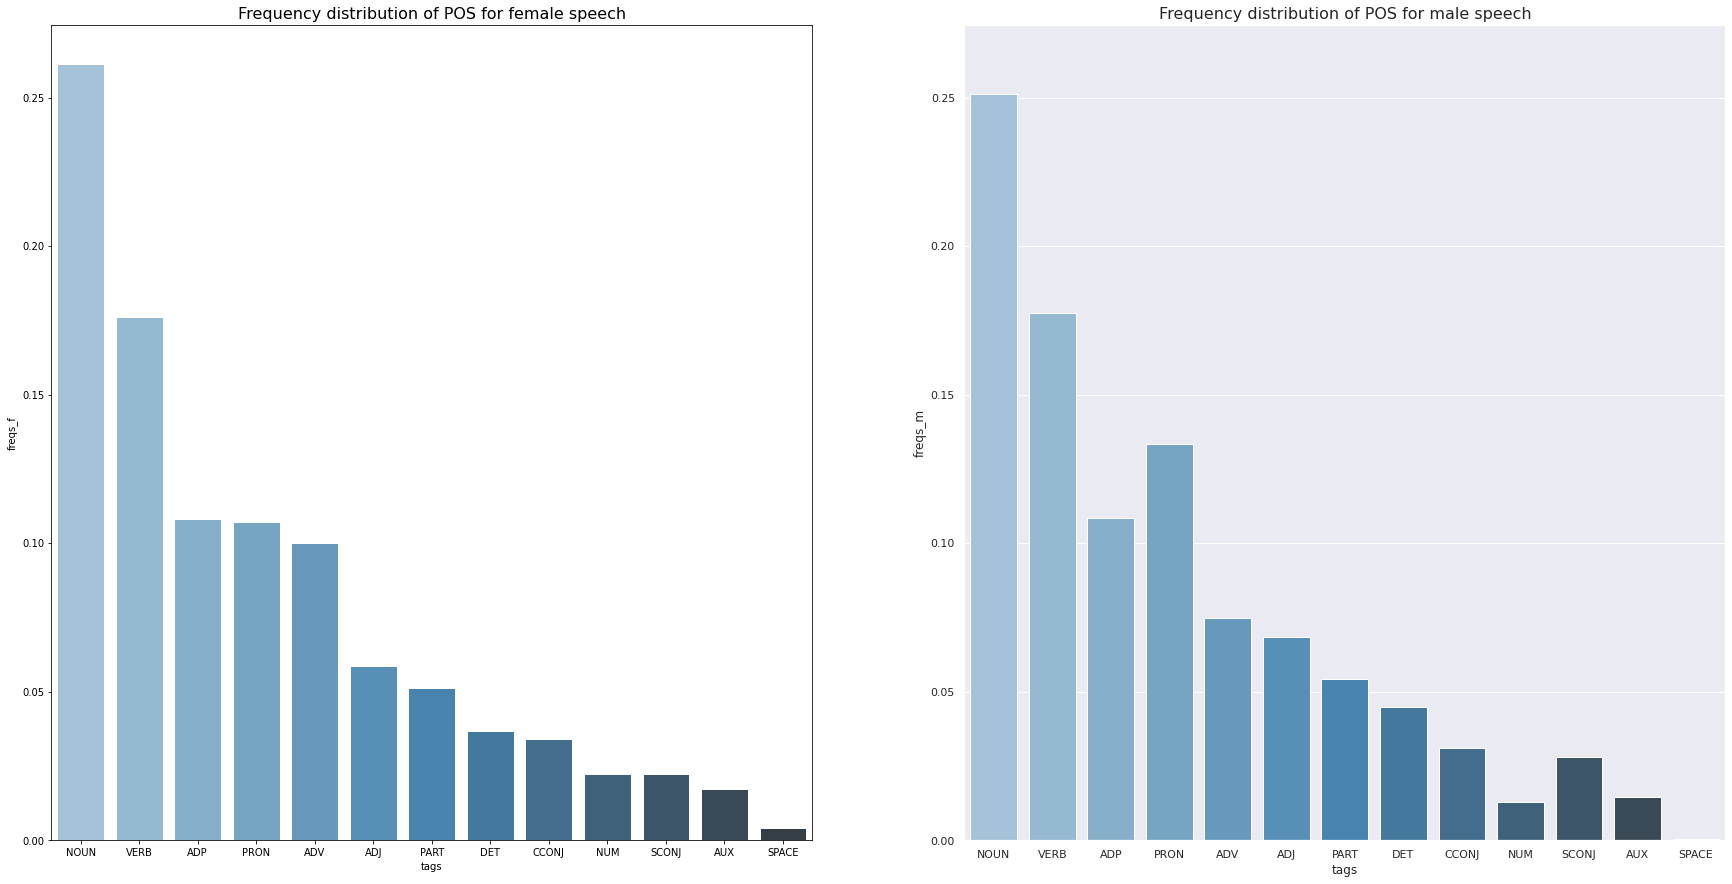

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 


fig, ax = plt.subplots(figsize=(30, 15))
ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Frequency distribution of POS for female speech", fontsize=16)
sns.set(rc={'figure.figsize':(40, 20)})
sns.barplot(x=df['tags'], y=df['freqs_f'], palette="Blues_d")
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
ax2.set_title("Frequency distribution of POS for male speech", fontsize=16)
sns.set(rc={'figure.figsize':(40, 20)})
sns.barplot(x=df['tags'], y=df['freqs_m'], palette="Blues_d")
plt.show()

## POS values analysis

In [12]:
def pos_values(dir_path, model):
    '''Function takes path to the directory with dialoque files 
    and processing model as arguments and returns a dictionary
    with POS as keys and sets of lemmas as values'''

    speech = {}
    for idx, fil in enumerate(os.listdir(dir_path)):
        if fil.endswith('txt'):
            with open(os.path.join(dir_path, fil)) as fh:
                sp = [i.strip() for i in fh.readlines()]
            speech[idx] = sp
    text = ''
    for i in speech.keys():
        text = ' '.join([text, ' '.join(speech[i])])
    text = text.replace('попкорн', '') 
    doc = model(text)
    pos_values = {}
    for word in doc:
        if word.pos_ not in pos_values.keys():
            pos_values[word.pos_] = set()
        pos_values[word.pos_].add(word.lemma_)
    return pos_values

In [13]:
fem = pos_values('/content/f_in', nlp)
m = pos_values('/content/m_in', nlp)

In [14]:
df['unique_f'] = df['tags'].apply( lambda x: fem[x].difference(m[x]))
df['unique_m'] = df['tags'].apply( lambda x: m[x].difference(fem[x]))

In [15]:
df

,tags,freqs_f,freqs_m,unique_f,unique_m
1,NOUN,0.261370,0.251323,"{восемьсот, ру, связь, товар, рассылка, речь, ...","{кнопка, звонок, февраль, пропажа, гагарин, да..."
2,VERB,0.176166,0.177487,"{работать, указываете, обходить, ответить, про...","{разобраться, удалить, отражаться, называть, з..."
9,ADP,0.108233,0.108387,"{про, плюс, между}","{ввиду, об, относительно, без, вместо, при, вн..."
4,PRON,0.107081,0.133463,"{котором, тебе, том, себя, ты}","{которую, ним, ими, нее, которой, их, них, мы,..."
7,ADV,0.100173,0.074673,"{кратко, данилыч, вверху, некорректно, угу, ни...","{влево, раньше, буквально, туже, назад, вообще..."
5,ADJ,0.058722,0.068543,"{пятый, корректный, данную, дополнительный, го...","{надёжный, юрьевич, возвращенным, крайний, кал..."
3,PART,0.051238,0.054333,{всего},"{таки, ли, ни, даже, нибудь}"
10,DET,0.036845,0.044859,{},"{один, всякий, то, наш, любой, тот}"
6,CCONJ,0.033967,0.031206,{},{}
8,NUM,0.022453,0.012817,"{девять, одного}","{тридцать, одиннадцать, больше, десять, восемь..."


In [16]:
df.unique_f[df.tags == 'VERB'].values[0]

{'али',
 'благодарить',
 'вводить',
 'вернуться',
 'восемнадцать',
 'восстановить',
 'вступить',
 'входить',
 'выбирать',
 'вынудить',
 'выражать',
 'выражаться',
 'действены',
 'зарегистрировать',
 'лечатся',
 'нажиматься',
 'называться',
 'направляться',
 'нарисовать',
 'обратную',
 'обращаетесь',
 'обходить',
 'объяснять',
 'ожидайте',
 'описать',
 'осуществить',
 'ответить',
 'отключаться',
 'переводить',
 'передвигаться',
 'писать',
 'подключить',
 'подписать',
 'подтвердить',
 'положить',
 'получать',
 'пользуетесь',
 'понадобиться',
 'поните',
 'понятное',
 'пополнять',
 'порожайте',
 'посоветовать',
 'поступить',
 'превысить',
 'предоставлять',
 'представляться',
 'приложить',
 'приостановить',
 'проведать',
 'проверю',
 'продать',
 'пройдете',
 'пропадать',
 'проявлять',
 'работать',
 'разделить',
 'разделывать',
 'разному',
 'рекомендоваться',
 'сбербанк',
 'слышать',
 'слышла',
 'сменить',
 'снимать',
 'совершать',
 'сожали',
 'составить',
 'указываете',
 'указывать',
 'улал

In [17]:
# True if the vocabulary of male operators is reacher
def f(x):
    return len(x['unique_m'])>len(x['unique_f'])

df['male_voc_variaty'] = df.apply(lambda x : f(x), axis=1)

In [18]:
df

,tags,freqs_f,freqs_m,unique_f,unique_m,male_voc_variaty
1,NOUN,0.261370,0.251323,"{восемьсот, ру, связь, товар, рассылка, речь, ...","{кнопка, звонок, февраль, пропажа, гагарин, да...",True
2,VERB,0.176166,0.177487,"{работать, указываете, обходить, ответить, про...","{разобраться, удалить, отражаться, называть, з...",True
9,ADP,0.108233,0.108387,"{про, плюс, между}","{ввиду, об, относительно, без, вместо, при, вн...",True
4,PRON,0.107081,0.133463,"{котором, тебе, том, себя, ты}","{которую, ним, ими, нее, которой, их, них, мы,...",True
7,ADV,0.100173,0.074673,"{кратко, данилыч, вверху, некорректно, угу, ни...","{влево, раньше, буквально, туже, назад, вообще...",True
5,ADJ,0.058722,0.068543,"{пятый, корректный, данную, дополнительный, го...","{надёжный, юрьевич, возвращенным, крайний, кал...",True
3,PART,0.051238,0.054333,{всего},"{таки, ли, ни, даже, нибудь}",True
10,DET,0.036845,0.044859,{},"{один, всякий, то, наш, любой, тот}",True
6,CCONJ,0.033967,0.031206,{},{},False
8,NUM,0.022453,0.012817,"{девять, одного}","{тридцать, одиннадцать, больше, десять, восемь...",True


В целом выборку трудно назвать репрезентативной:) 

Из интересного:

1. Операторы мужского пола чаще используют местоимения и эти местоимения более разнообразны (вполне может быть связано с тем, что токенов мужской речи у нас в 2 раза больше, чем женской). На разницу в числительных я бы не обращала внимания, так как это банковские операции, числа связаны с темой разговора а не со спецификой речи.

2. Складывается ощущение, что словарь у операторов мужского пола более разнообразный (вполне может быть связано с тем, что токенов мужской речи у нас в 2 раза больше, чем женской). При этом если взглянуть поближе на уникальную лексику, то можно заметить, что операторы мужского пола чаще используют официальный стиль и штампы

In [19]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

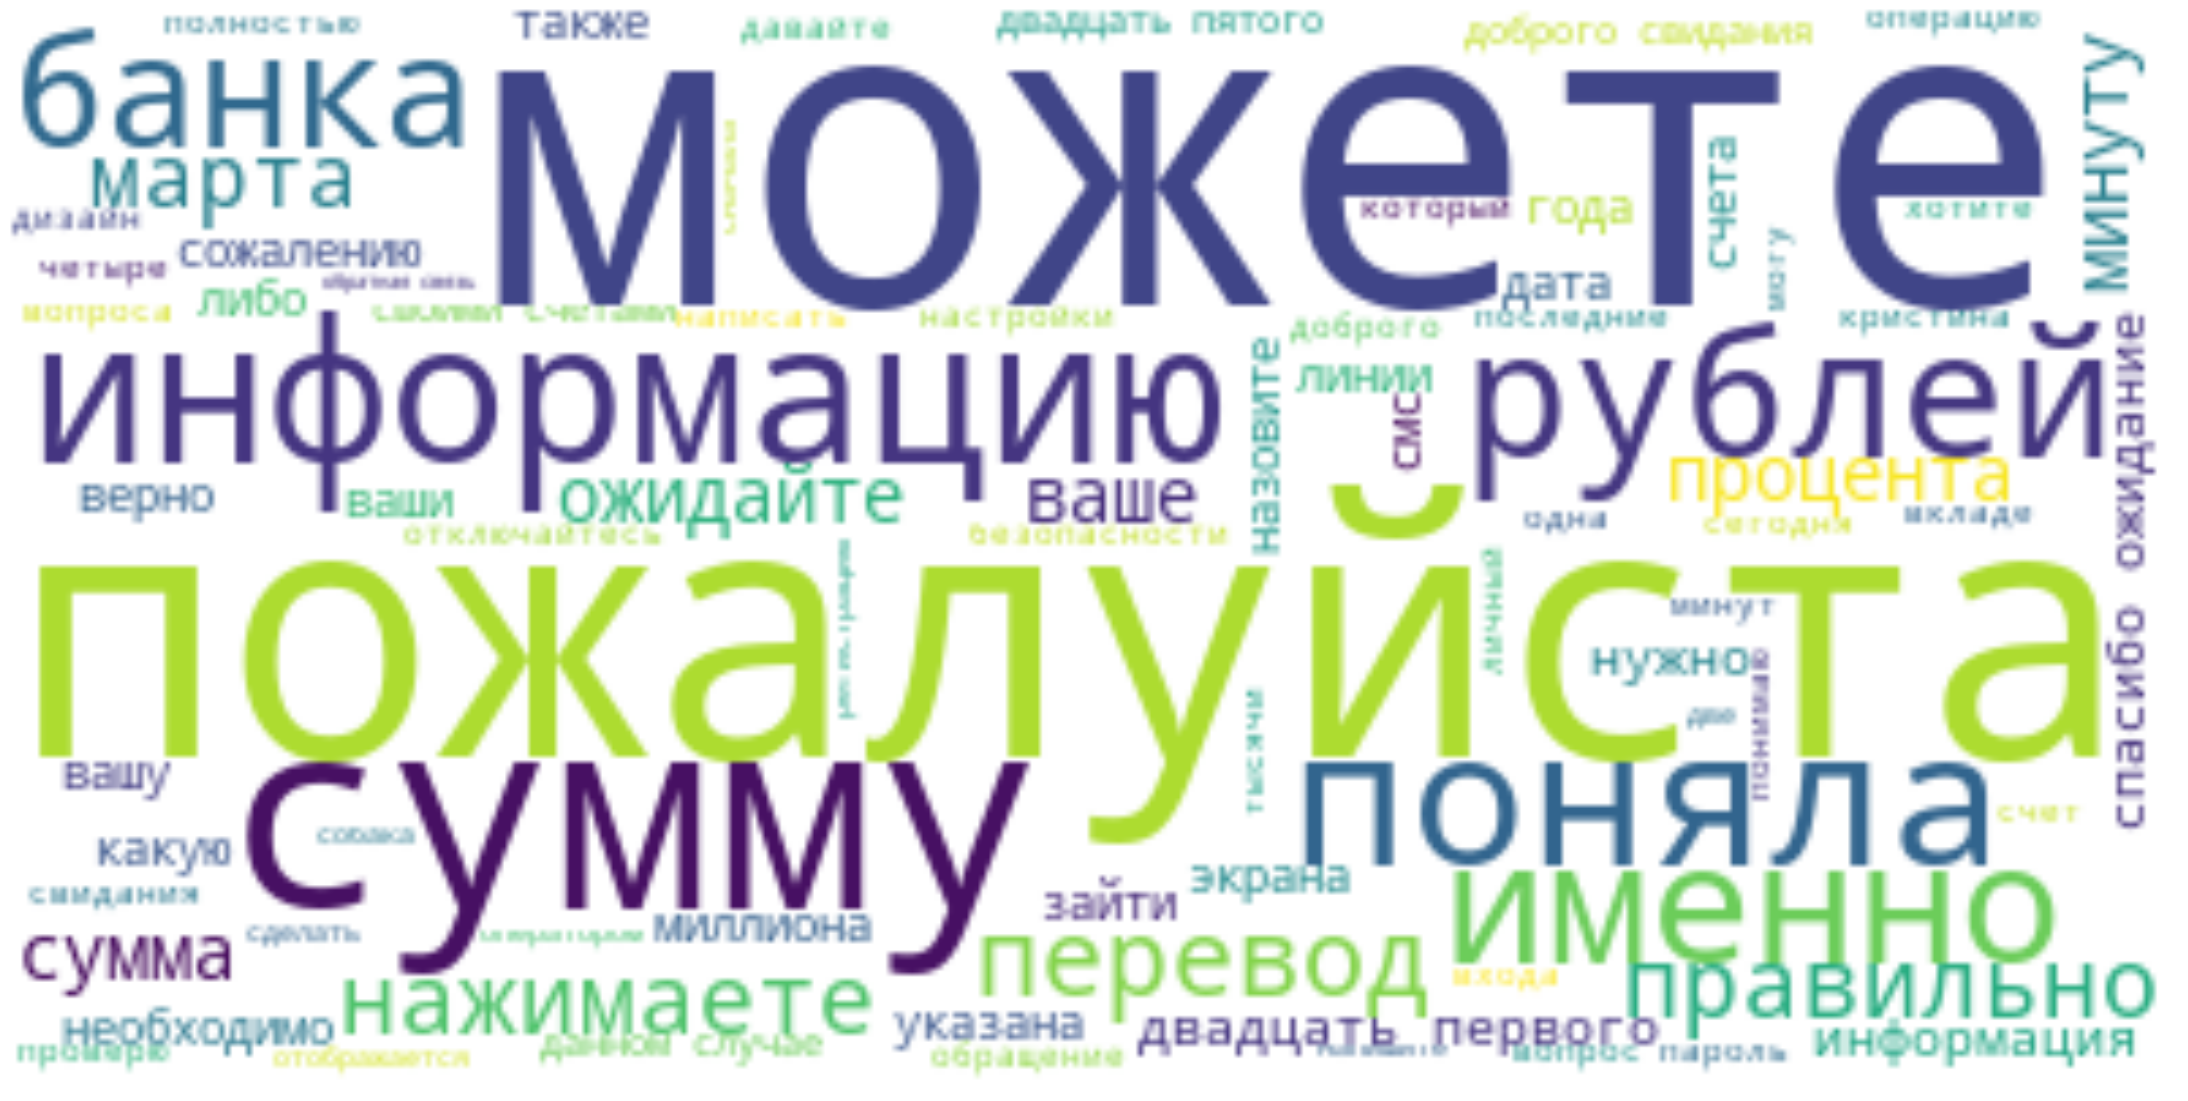

In [20]:
stop = stopwords.words("russian") + ['сбербанк', 'это', 'здравствуйте', 'онлайн', 'карта', 'карты', 'карту']
wordcloud = WordCloud(stopwords=stop, background_color="white").generate(f_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

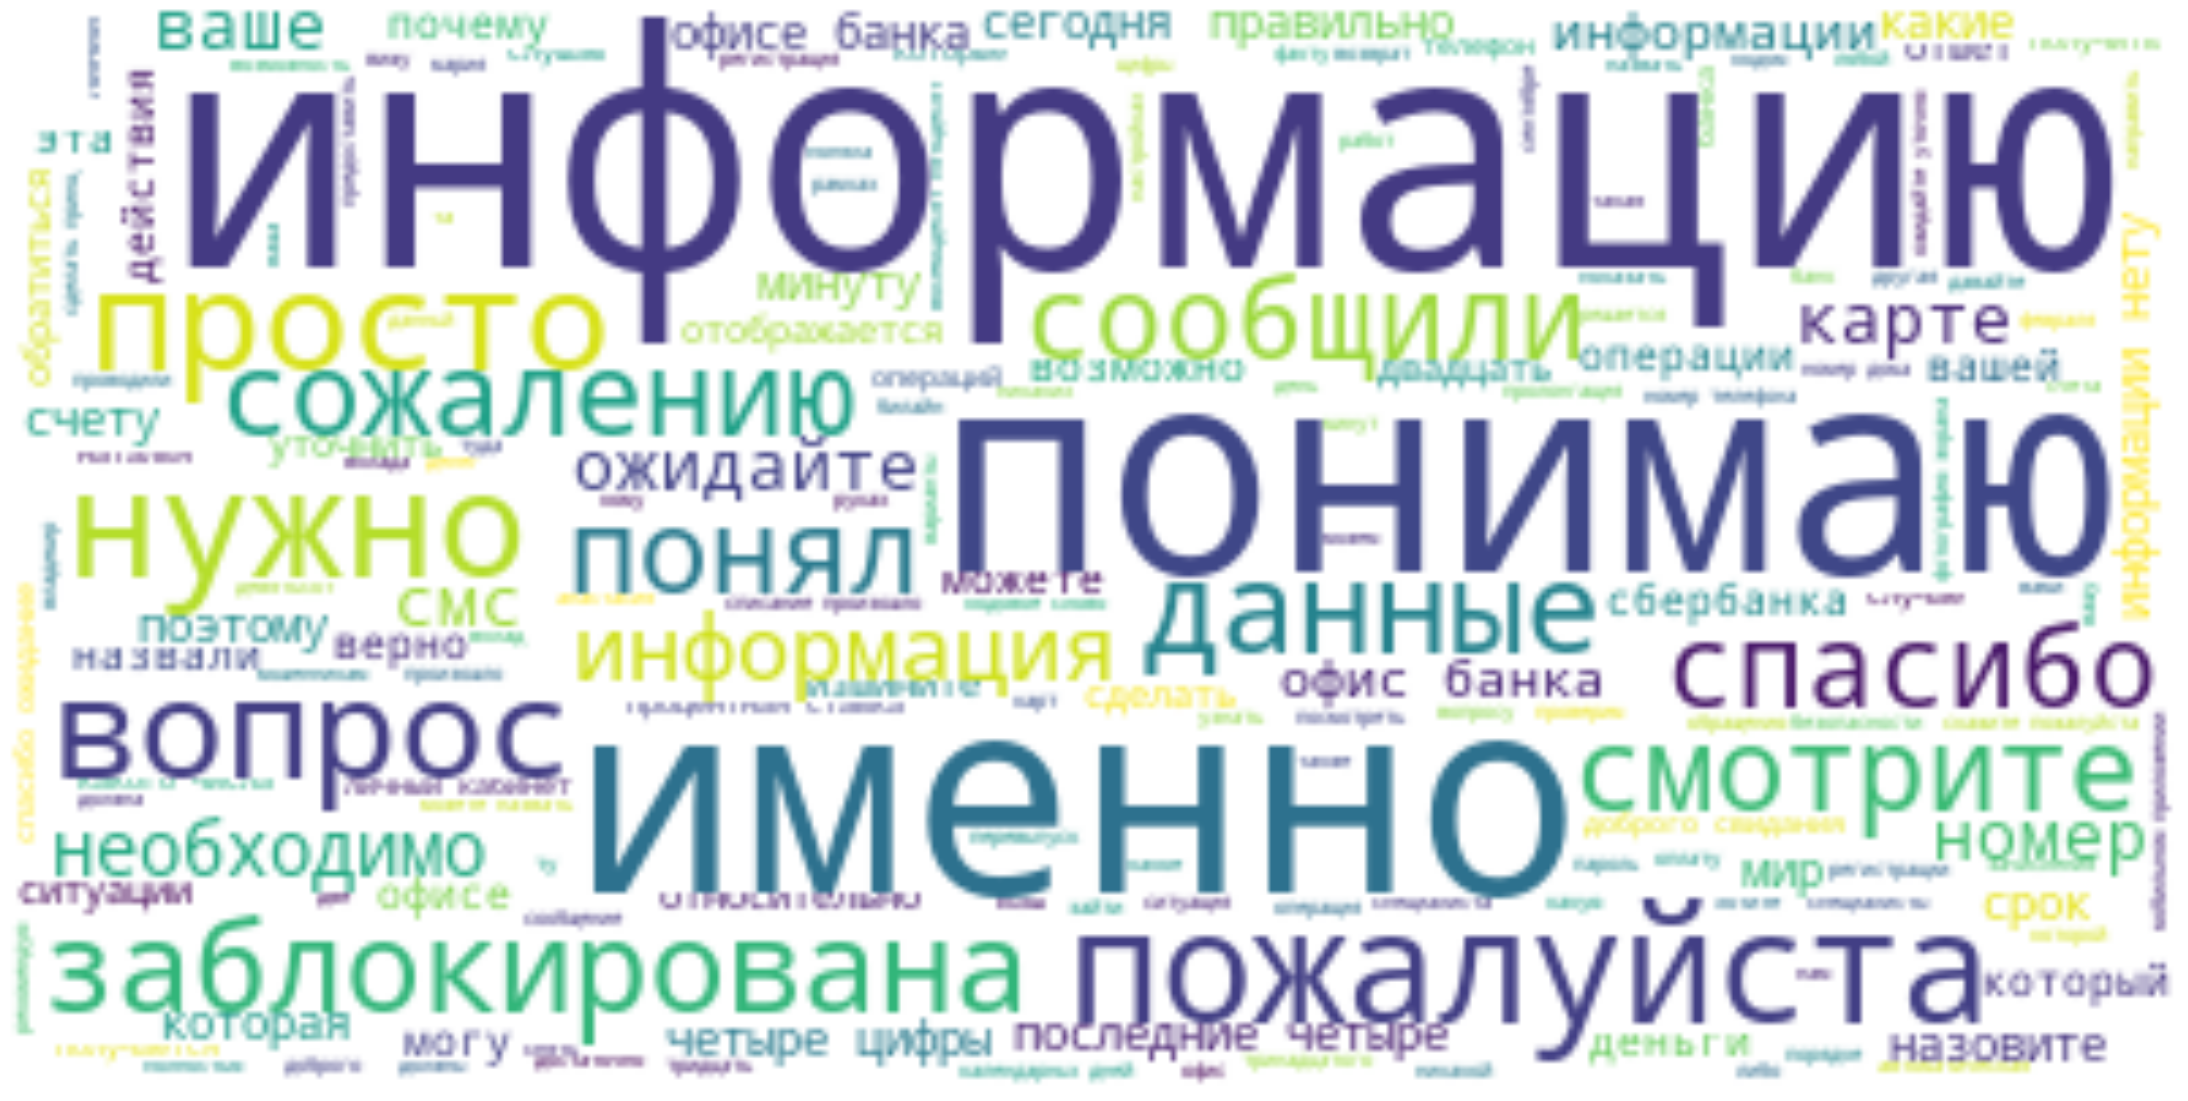

In [21]:
wordcloud = WordCloud(stopwords=stop, background_color="white").generate(m_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()